In [111]:
import pandas as pd
import os
import sys
import missingno as msno

# Importing the data

In [112]:
os.getcwd()

'C:\\Users\\kople\\Documents\\Personal Git repos\\Water-Quality-Prediction\\notebooks'

In [113]:
df = pd.read_csv('C:/Users/kople/Documents/Personal Git repos/Water-Quality-Prediction/data/raw/water_dataX.csv',encoding='ISO-8859-1')

In [114]:
df

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203,NAN,0.1,11,27,2014
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189,2,0.2,4953,8391,2014
2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179,1.7,0.1,3243,5330,2014
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64,3.8,0.5,5382,8443,2014
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83,1.9,0.4,3428,5500,2014
...,...,...,...,...,...,...,...,...,...,...,...,...
1986,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NAN,NAN,7.9,738,7.2,2.7,0.518,0.518,202,2003
1987,1450,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",NAN,29,7.5,585,6.3,2.6,0.155,0.155,315,2003
1988,1403,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",NAN,28,7.6,98,6.2,1.2,NAN,NAN,570,2003
1989,1404,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",NAN,28,7.7,91,6.5,1.3,NAN,NAN,562,2003


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1991 entries, 0 to 1990
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   STATION CODE                      1991 non-null   object
 1   LOCATIONS                         1991 non-null   object
 2   STATE                             1991 non-null   object
 3   Temp                              1991 non-null   object
 4   D.O. (mg/l)                       1991 non-null   object
 5   PH                                1991 non-null   object
 6   CONDUCTIVITY (µmhos/cm)           1991 non-null   object
 7   B.O.D. (mg/l)                     1991 non-null   object
 8   NITRATENAN N+ NITRITENANN (mg/l)  1991 non-null   object
 9   FECAL COLIFORM (MPN/100ml)        1991 non-null   object
 10  TOTAL COLIFORM (MPN/100ml)Mean    1991 non-null   object
 11  year                              1991 non-null   int64 
dtypes: int64(1), object(

# EDA on Indian dataset

In [116]:
df.dtypes

STATION CODE                        object
LOCATIONS                           object
STATE                               object
Temp                                object
D.O. (mg/l)                         object
PH                                  object
CONDUCTIVITY (µmhos/cm)             object
B.O.D. (mg/l)                       object
NITRATENAN N+ NITRITENANN (mg/l)    object
FECAL COLIFORM (MPN/100ml)          object
TOTAL COLIFORM (MPN/100ml)Mean      object
year                                 int64
dtype: object

Converting the columns to numeric type

In [117]:
df['STATION CODE']= pd.to_numeric(df['STATION CODE'],errors='coerce')

In [118]:
df[df['STATION CODE'].isnull()]

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
260,NaN,NAN,NAN,NAN,NAN,NAN,NAN,NAN,NAN,NAN,NAN,2013
431,NaN,NAN,NAN,NAN,NAN,NAN,NAN,NAN,NAN,NAN,NAN,2013
1782,NaN,"NAGAVALLI AT THOTAPALLI REGULATOR, A.P.",NAN,28,5.6,7.65,375.2,1.758,1.995,2636,18417,2005
1783,NaN,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",NAN,NAN,NAN,7.76,233.3,10.825,5.657,NAN,NAN,2005
1784,NaN,"DAMANGANGA AFTER CONFL. OF PIPARIA DRAIN, DAMAN",NAN,NAN,NAN,NAN,NAN,1,1.01,1200,37000,2005
...,...,...,...,...,...,...,...,...,...,...,...,...
1897,NaN,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",NAN,28,6.6,7.49,571.5,2.091,0.256,151,273,2005
1898,NaN,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",NAN,28,5.4,7.16,75.8,2.092,NAN,404,513,2005
1899,NaN,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",NAN,30,5.4,7.37,104.8,1.802,0.215,456,557,2005
1900,NaN,"CHANDRAPUR, AGARTALA D/S OF HAORA RIVER, TRIPURA",NAN,29,5.3,7.37,102.2,2.552,0.202,526,583,2005


In [119]:
df['Temp']= pd.to_numeric(df['Temp'],errors='coerce')

In [120]:
df['D.O. (mg/l)']= pd.to_numeric(df['D.O. (mg/l)'],errors='coerce')

In [121]:
df['PH']= pd.to_numeric(df['PH'],errors='coerce')

In [122]:
df['CONDUCTIVITY (µmhos/cm)']= pd.to_numeric(df['CONDUCTIVITY (µmhos/cm)'],errors='coerce')

In [123]:
df['B.O.D. (mg/l)']= pd.to_numeric(df['B.O.D. (mg/l)'],errors='coerce')

In [124]:
df['NITRATENAN N+ NITRITENANN (mg/l)']= pd.to_numeric(df['NITRATENAN N+ NITRITENANN (mg/l)'],errors='coerce')

In [125]:
df['FECAL COLIFORM (MPN/100ml)']= pd.to_numeric(df['FECAL COLIFORM (MPN/100ml)'],errors='coerce')

In [126]:
df['TOTAL COLIFORM (MPN/100ml)Mean']= pd.to_numeric(df['TOTAL COLIFORM (MPN/100ml)Mean'],errors='coerce')

In [127]:
df.dtypes

STATION CODE                        float64
LOCATIONS                            object
STATE                                object
Temp                                float64
D.O. (mg/l)                         float64
PH                                  float64
CONDUCTIVITY (µmhos/cm)             float64
B.O.D. (mg/l)                       float64
NITRATENAN N+ NITRITENANN (mg/l)    float64
FECAL COLIFORM (MPN/100ml)          float64
TOTAL COLIFORM (MPN/100ml)Mean      float64
year                                  int64
dtype: object

In [128]:
df

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
0,1393.0,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203.0,NaN,0.100,11.000,27.0,2014
1,1399.0,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189.0,2.0,0.200,4953.000,8391.0,2014
2,1475.0,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179.0,1.7,0.100,3243.000,5330.0,2014
3,3181.0,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64.0,3.8,0.500,5382.000,8443.0,2014
4,3182.0,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83.0,1.9,0.400,3428.000,5500.0,2014
...,...,...,...,...,...,...,...,...,...,...,...,...
1986,1330.0,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NAN,NaN,7.9,738.0,7.2,2.7,0.518,0.518,202.0,2003
1987,1450.0,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",NAN,29.0,7.5,585.0,6.3,2.6,0.155,0.155,315.0,2003
1988,1403.0,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",NAN,28.0,7.6,98.0,6.2,1.2,NaN,NaN,570.0,2003
1989,1404.0,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",NAN,28.0,7.7,91.0,6.5,1.3,NaN,NaN,562.0,2003


# Renaming columns

In [129]:
df.rename(columns={"STATION CODE":"station","LOCATIONS":"location","STATE":"state","D.O. (mg/l)":"do","PH":"ph","CONDUCTIVITY (µmhos/cm)":"conductivity","B.O.D. (mg/l)":"BOD","NITRATENAN N+ NITRITENANN (mg/l)":"nn","FECAL COLIFORM (MPN/100ml)":"fecal_coliform","TOTAL COLIFORM (MPN/100ml)Mean":"total_coliform_mean"}, inplace=True)

In [130]:
df

,station,location,state,Temp,do,ph,conductivity,BOD,nn,fecal_coliform,total_coliform_mean,year
0,1393.0,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203.0,NaN,0.100,11.000,27.0,2014
1,1399.0,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189.0,2.0,0.200,4953.000,8391.0,2014
2,1475.0,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179.0,1.7,0.100,3243.000,5330.0,2014
3,3181.0,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64.0,3.8,0.500,5382.000,8443.0,2014
4,3182.0,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83.0,1.9,0.400,3428.000,5500.0,2014
...,...,...,...,...,...,...,...,...,...,...,...,...
1986,1330.0,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NAN,NaN,7.9,738.0,7.2,2.7,0.518,0.518,202.0,2003
1987,1450.0,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",NAN,29.0,7.5,585.0,6.3,2.6,0.155,0.155,315.0,2003
1988,1403.0,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",NAN,28.0,7.6,98.0,6.2,1.2,NaN,NaN,570.0,2003
1989,1404.0,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",NAN,28.0,7.7,91.0,6.5,1.3,NaN,NaN,562.0,2003


Checking missing values

<AxesSubplot:>

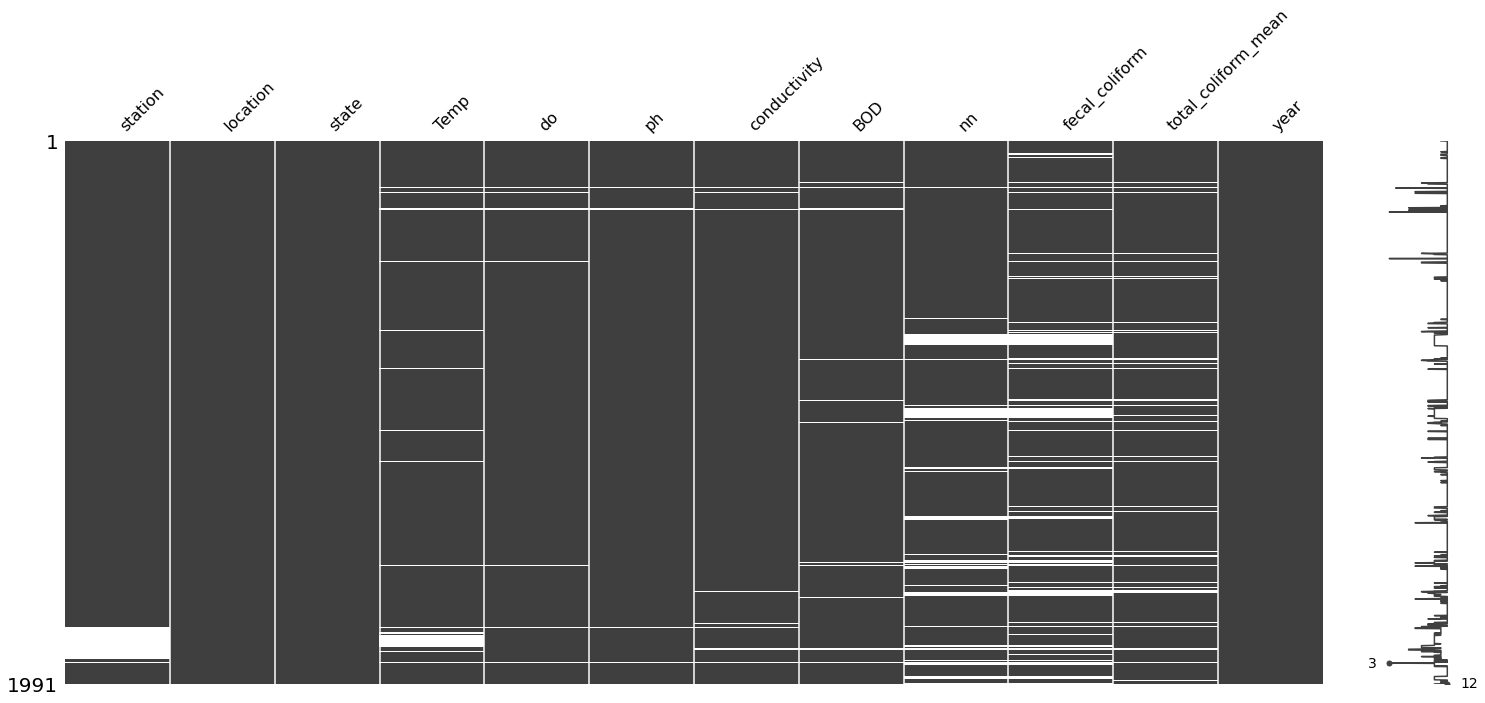

In [131]:
msno.matrix(df)

In [132]:
df

,station,location,state,Temp,do,ph,conductivity,BOD,nn,fecal_coliform,total_coliform_mean,year
0,1393.0,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203.0,NaN,0.100,11.000,27.0,2014
1,1399.0,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189.0,2.0,0.200,4953.000,8391.0,2014
2,1475.0,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179.0,1.7,0.100,3243.000,5330.0,2014
3,3181.0,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64.0,3.8,0.500,5382.000,8443.0,2014
4,3182.0,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83.0,1.9,0.400,3428.000,5500.0,2014
...,...,...,...,...,...,...,...,...,...,...,...,...
1986,1330.0,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NAN,NaN,7.9,738.0,7.2,2.7,0.518,0.518,202.0,2003
1987,1450.0,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",NAN,29.0,7.5,585.0,6.3,2.6,0.155,0.155,315.0,2003
1988,1403.0,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",NAN,28.0,7.6,98.0,6.2,1.2,NaN,NaN,570.0,2003
1989,1404.0,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",NAN,28.0,7.7,91.0,6.5,1.3,NaN,NaN,562.0,2003


In [133]:
print(df.station.nunique())
print(df.state.nunique())

320
203


# WQI calculation

## Rating calculation

The recommended values (Si) of all the parameters

In [134]:
do_s = 10
ph_s = 8.5
conductivity_s = 1000
bod_s = 5
nitrate_s = 45
fecal_coliform_s = 100
total_coliform_s = 1000

In [135]:
features = ['conductivity','BOD','nn','fecal_coliform','total_coliform_mean']

In [136]:
df_qi = pd.DataFrame()

In [137]:
df_qi['qi_conductivity']=100*df['conductivity']/(conductivity_s)
df_qi['qi_do']=100*(df['do']-14.6)/(do_s-14.6)
df_qi['qi_ph']=100*(df['ph']-7)/(ph_s-7)
df_qi['qi_bod']=100*(df['BOD'])/(bod_s)
df_qi['qi_nn']=100*(df['nn'])/(nitrate_s)
df_qi['qi_fecal_coliform']=100*(df['fecal_coliform'])/(fecal_coliform_s)
df_qi['qi_total_coliform_mean']=100*(df['total_coliform_mean'])/(total_coliform_s)

In [138]:
df_qi

,qi_conductivity,qi_do,qi_ph,qi_bod,qi_nn,qi_fecal_coliform,qi_total_coliform_mean
0,20.30,171.739130,33.333333,NaN,0.222222,11.000,2.7
1,18.90,193.478261,13.333333,40.0,0.444444,4953.000,839.1
2,17.90,180.434783,-6.666667,34.0,0.222222,3243.000,533.0
3,6.40,191.304348,-6.666667,76.0,1.111111,5382.000,844.3
4,8.30,191.304348,20.000000,38.0,0.888889,3428.000,550.0
...,...,...,...,...,...,...,...
1986,0.72,145.652174,48733.333333,54.0,1.151111,0.518,20.2
1987,0.63,154.347826,38533.333333,52.0,0.344444,0.155,31.5
1988,0.62,152.173913,6066.666667,24.0,NaN,NaN,57.0
1989,0.65,150.000000,5600.000000,26.0,NaN,NaN,56.2


In [139]:
df

,station,location,state,Temp,do,ph,conductivity,BOD,nn,fecal_coliform,total_coliform_mean,year
0,1393.0,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203.0,NaN,0.100,11.000,27.0,2014
1,1399.0,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189.0,2.0,0.200,4953.000,8391.0,2014
2,1475.0,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179.0,1.7,0.100,3243.000,5330.0,2014
3,3181.0,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64.0,3.8,0.500,5382.000,8443.0,2014
4,3182.0,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83.0,1.9,0.400,3428.000,5500.0,2014
...,...,...,...,...,...,...,...,...,...,...,...,...
1986,1330.0,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NAN,NaN,7.9,738.0,7.2,2.7,0.518,0.518,202.0,2003
1987,1450.0,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",NAN,29.0,7.5,585.0,6.3,2.6,0.155,0.155,315.0,2003
1988,1403.0,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",NAN,28.0,7.6,98.0,6.2,1.2,NaN,NaN,570.0,2003
1989,1404.0,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",NAN,28.0,7.7,91.0,6.5,1.3,NaN,NaN,562.0,2003


Parameter weights

In [140]:
do_w = 0.2213
ph_w = 0.2604
conductivity_w = 0.0022
bod_w = 0.4426
n_w = 0.0492
fecal_coliform_w = 0.0221
total_coliform_w = 0.0022
w_total =  1

In [143]:
df2 = pd.concat([df,df_qi],axis=1)

In [144]:
df2

,station,location,state,Temp,do,ph,conductivity,BOD,nn,fecal_coliform,total_coliform_mean,year,qi_conductivity,qi_do,qi_ph,qi_bod,qi_nn,qi_fecal_coliform,qi_total_coliform_mean
0,1393.0,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203.0,NaN,0.100,11.000,27.0,2014,20.30,171.739130,33.333333,NaN,0.222222,11.000,2.7
1,1399.0,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189.0,2.0,0.200,4953.000,8391.0,2014,18.90,193.478261,13.333333,40.0,0.444444,4953.000,839.1
2,1475.0,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179.0,1.7,0.100,3243.000,5330.0,2014,17.90,180.434783,-6.666667,34.0,0.222222,3243.000,533.0
3,3181.0,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64.0,3.8,0.500,5382.000,8443.0,2014,6.40,191.304348,-6.666667,76.0,1.111111,5382.000,844.3
4,3182.0,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83.0,1.9,0.400,3428.000,5500.0,2014,8.30,191.304348,20.000000,38.0,0.888889,3428.000,550.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1986,1330.0,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NAN,NaN,7.9,738.0,7.2,2.7,0.518,0.518,202.0,2003,0.72,145.652174,48733.333333,54.0,1.151111,0.518,20.2
1987,1450.0,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",NAN,29.0,7.5,585.0,6.3,2.6,0.155,0.155,315.0,2003,0.63,154.347826,38533.333333,52.0,0.344444,0.155,31.5
1988,1403.0,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",NAN,28.0,7.6,98.0,6.2,1.2,NaN,NaN,570.0,2003,0.62,152.173913,6066.666667,24.0,NaN,NaN,57.0
1989,1404.0,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",NAN,28.0,7.7,91.0,6.5,1.3,NaN,NaN,562.0,2003,0.65,150.000000,5600.000000,26.0,NaN,NaN,56.2


In [147]:
df2['wqi']=df2['qi_conductivity']*conductivity_w+\
           df2['qi_do']*do_w+\
           df2['qi_ph']*ph_w+\
           df2['qi_bod']*bod_w+\
           df2['qi_nn']*n_w+\
           df2['qi_fecal_coliform']*fecal_coliform_w+\
           df2['qi_total_coliform_mean']*total_coliform_w

In [148]:
df2

,station,location,state,Temp,do,ph,conductivity,BOD,nn,fecal_coliform,total_coliform_mean,year,qi_conductivity,qi_do,qi_ph,qi_bod,qi_nn,qi_fecal_coliform,qi_total_coliform_mean,wqi
0,1393.0,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203.0,NaN,0.100,11.000,27.0,2014,20.30,171.739130,33.333333,NaN,0.222222,11.000,2.7,NaN
1,1399.0,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189.0,2.0,0.200,4953.000,8391.0,2014,18.90,193.478261,13.333333,40.0,0.444444,4953.000,839.1,175.363506
2,1475.0,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179.0,1.7,0.100,3243.000,5330.0,2014,17.90,180.434783,-6.666667,34.0,0.222222,3243.000,533.0,126.135831
3,3181.0,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64.0,3.8,0.500,5382.000,8443.0,2014,6.40,191.304348,-6.666667,76.0,1.111111,5382.000,844.3,195.105659
4,3182.0,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83.0,1.9,0.400,3428.000,5500.0,2014,8.30,191.304348,20.000000,38.0,0.888889,3428.000,550.0,141.393246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1986,1330.0,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NAN,NaN,7.9,738.0,7.2,2.7,0.518,0.518,202.0,2003,0.72,145.652174,48733.333333,54.0,1.151111,0.518,20.2,12746.407333
1987,1450.0,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",NAN,29.0,7.5,585.0,6.3,2.6,0.155,0.155,315.0,2003,0.63,154.347826,38533.333333,52.0,0.344444,0.155,31.5,10091.343432
1988,1403.0,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",NAN,28.0,7.6,98.0,6.2,1.2,NaN,NaN,570.0,2003,0.62,152.173913,6066.666667,24.0,NaN,NaN,57.0,NaN
1989,1404.0,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",NAN,28.0,7.7,91.0,6.5,1.3,NaN,NaN,562.0,2003,0.65,150.000000,5600.000000,26.0,NaN,NaN,56.2,NaN


# adding the WQI to the original dataframe

In [165]:
df3 = pd.concat([df,df2.wqi],axis=1)

In [167]:
df3

,station,location,state,Temp,do,ph,conductivity,BOD,nn,fecal_coliform,total_coliform_mean,year,wqi
0,1393.0,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203.0,NaN,0.100,11.000,27.0,2014,NaN
1,1399.0,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189.0,2.0,0.200,4953.000,8391.0,2014,175.363506
2,1475.0,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179.0,1.7,0.100,3243.000,5330.0,2014,126.135831
3,3181.0,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64.0,3.8,0.500,5382.000,8443.0,2014,195.105659
4,3182.0,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83.0,1.9,0.400,3428.000,5500.0,2014,141.393246
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1986,1330.0,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NAN,NaN,7.9,738.0,7.2,2.7,0.518,0.518,202.0,2003,12746.407333
1987,1450.0,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",NAN,29.0,7.5,585.0,6.3,2.6,0.155,0.155,315.0,2003,10091.343432
1988,1403.0,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",NAN,28.0,7.6,98.0,6.2,1.2,NaN,NaN,570.0,2003,NaN
1989,1404.0,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",NAN,28.0,7.7,91.0,6.5,1.3,NaN,NaN,562.0,2003,NaN


# Handling missing values

We'll just remove them

<AxesSubplot:>

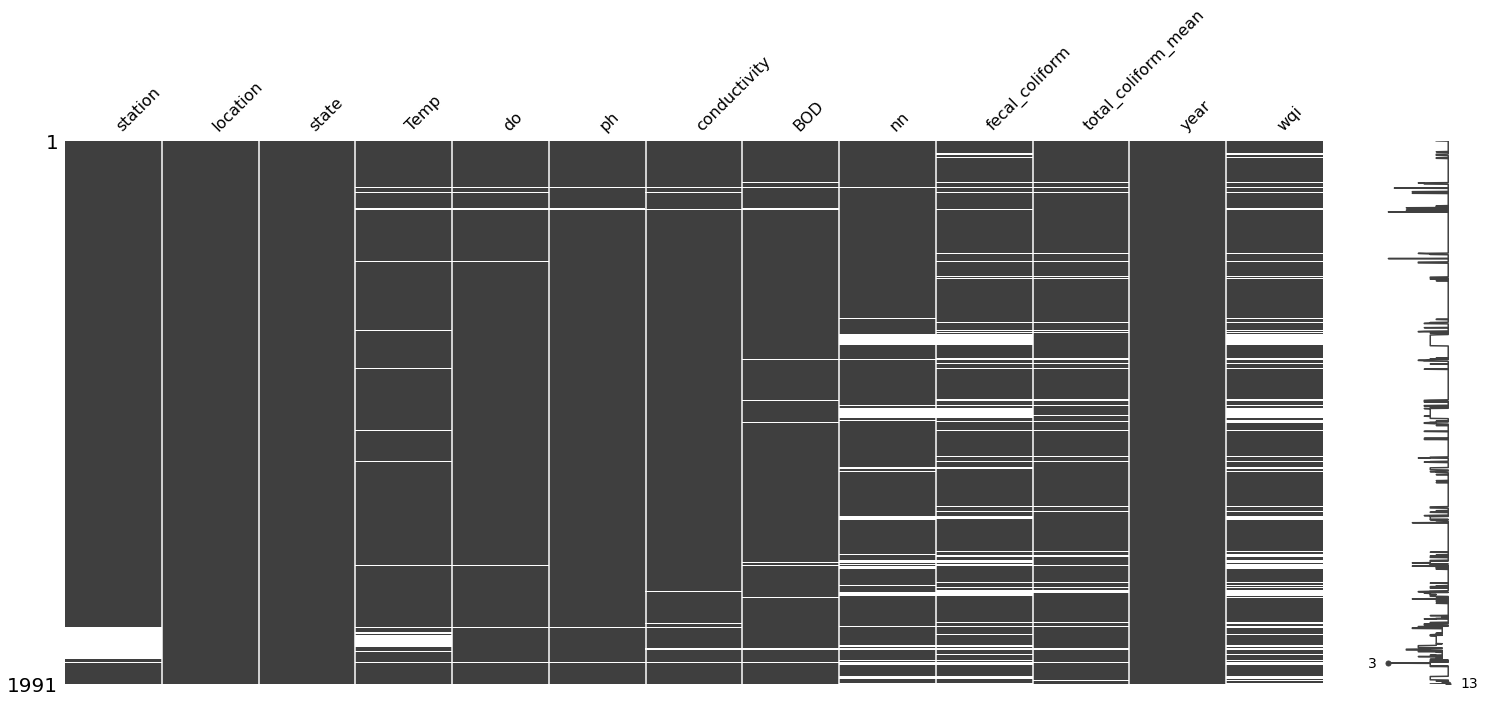

In [184]:
msno.matrix(df3)

# Feature selection

In [168]:
x = df3[['Temp','do','ph','conductivity','BOD','nn','fecal_coliform','total_coliform_mean']]

In [169]:
y = df3.wqi

In [176]:
y

0                NaN
1         175.363506
2         126.135831
3         195.105659
4         141.393246
            ...     
1986    12746.407333
1987    10091.343432
1988             NaN
1989             NaN
1990             NaN
Name: wqi, Length: 1991, dtype: float64

# Splitting into training and testing data

In [172]:
from sklearn.model_selection import train_test_split

In [173]:
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.3)

In [174]:
x_train

,Temp,do,ph,conductivity,BOD,nn,fecal_coliform,total_coliform_mean
1166,26.8,7.00,6.900,73.0,1.7,0.400,87.0,144.0
790,20.0,7.70,7.100,49.0,1.9,3.890,11.0,26.0
3,29.7,5.80,6.900,64.0,3.8,0.500,5382.0,8443.0
27,30.1,6.50,7.500,415.0,2.0,0.100,864.0,1538.0
391,30.8,6.30,7.000,18931.0,1.4,1.000,34.0,201.0
...,...,...,...,...,...,...,...,...
912,27.3,7.60,7.200,59.0,0.6,0.650,463.0,1163.0
100,25.8,7.20,7.200,41.0,0.7,0.200,441.0,658.0
1764,19.0,4.05,7.850,773.5,16.0,19.350,NaN,NaN
1681,25.5,7.05,7.995,535.0,4.7,1.195,13400.0,33500.0


In [177]:
y_train

1166     51.889182
790      52.434707
3       195.105659
27       84.887037
391      57.392791
           ...    
912      53.031494
100      55.190581
1764           NaN
1681    398.958019
1259     78.457362
Name: wqi, Length: 1393, dtype: float64

# Scaling the data

In [160]:
from sklearn import preprocessing

In [180]:
scaler = preprocessing.StandardScaler().fit(x_train)

In [181]:
x_scaled = scaler.transform(x_train)

In [182]:
x_scaled

array([[ 0.1853428 ,  0.43997849, -0.05977281, ..., -0.3516505 ,
        -0.04015283, -0.03547399],
       [-1.85023089,  0.96369869, -0.05968064, ...,  0.69933879,
        -0.04016119, -0.03548195],
       [ 1.05345511, -0.45782757, -0.05977281, ..., -0.32153619,
        -0.03956982, -0.03491422],
       ...,
       [-2.14957996, -1.76712807, -0.05933502, ...,  5.35501052,
                nan,         nan],
       [-0.20381099,  0.47738707, -0.0592682 , ..., -0.11224177,
        -0.03868701, -0.03322413],
       [-0.05413646,  0.36516132, -0.05958848, ..., -0.26733044,
        -0.04015051, -0.03546637]])

In [183]:
x_scaled.mean(axis=0)

array([nan, nan, nan, nan, nan, nan, nan, nan])

# WQC determination

Excellent = 5
Good = 4
Poor = 3
Very Poor = 2
Unsuitable for drinking = 1

In [149]:
def wqc(df):
    WQI = df.wqi
    if WQI<=25:
        WQC=5
    elif WQI>25 and WQI<=50:
        WQC=4
    elif WQI>50 and WQI<=75:
        WQC=3
    elif WQI>75 and WQI<=100:
        WQC=2
    elif WQI>100:
        WQC=1
    return WQC